In [1]:
# pip install --upgrade matplotlib seaborn

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os


In [4]:

# Load the datasets
def load_scores(file_path):
    """
    Load score CSV files and perform initial preprocessing
    
    Parameters:
    -----------
    file_path : str
        Path to the CSV file containing model scores
    
    Returns:
    --------
    pd.DataFrame
        Processed DataFrame with model scores
    """
    df = pd.read_csv(file_path)
    
    # Basic data validation
    print(f"\nDataset: {file_path}")
    print("Dataset Shape:", df.shape)
    print("\nColumn Info:")
    print(df.info())
    
    return df

# Descriptive Statistics
def describe_scores(df, title):
    """
    Compute and print descriptive statistics for the scores
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame containing model scores
    title : str
        Title or identifier for the dataset
    """
    print(f"\n--- Descriptive Statistics for {title} ---")
    print(df['Public score'].describe())
    
    return df['Public score'].describe()

# Visualizations
def create_visualizations(fast_df, slow_df):
    """
    Create visualizations to compare model scores
    
    Parameters:
    -----------
    fast_df : pd.DataFrame
        DataFrame for the faster model
    slow_df : pd.DataFrame
        DataFrame for the slower model
    """
    plt.figure(figsize=(12, 5))
    
    # Boxplot
    plt.subplot(1, 2, 1)
    boxplot_data = [fast_df['Public score'], slow_df['Public score']]
    plt.boxplot(boxplot_data, labels=['Fast Model', 'Slow Model'])
    plt.title('Box Plot')
    plt.ylabel('Kaggle Public Score')
    
    # Violin Plot
    plt.subplot(1, 2, 2)
    combined_df = pd.concat([fast_df.assign(Model='Fast Model'), slow_df.assign(Model='Slow Model')])
    sns.violinplot(x='Model', y='Public score', data=combined_df)
    plt.title('Violin Plot')
    plt.ylabel('')
    
    plt.tight_layout()
    plt.show()  # Display the plots inline
    # plt.savefig('model_score_comparison.png')
    plt.close()

def plot_public_score_vs_corte(fast_df, slow_df):
    """
    Plot public score vs corte for both models in the same plot
    
    Parameters:
    -----------
    fast_df : pd.DataFrame
        DataFrame for the faster model
    slow_df : pd.DataFrame
        DataFrame for the slower model
    """
    plt.figure(figsize=(10, 6))
    
    # Plot for fast model
    plt.plot(fast_df['corte'], fast_df['Public score'], label='Fast Model', marker='o')
    
    # Plot for slow model
    plt.plot(slow_df['corte'], slow_df['Public score'], label='Slow Model', marker='x')
    
    # Adding titles and labels
    plt.title('Public Score vs Corte')
    plt.xlabel('Corte')
    plt.ylabel('Kaggle Public Score')
    plt.legend()
    
    # Show plot
    plt.show()

# Statistical Testing
def perform_statistical_tests(fast_df, slow_df):
    """
    Perform statistical tests to compare model scores
    
    Parameters:
    -----------
    fast_df : pd.DataFrame
        DataFrame for the faster model
    slow_df : pd.DataFrame
        DataFrame for the slower model
    
    Returns:
    --------
    dict
        Results of statistical tests
    """
    # Shapiro-Wilk test for normality
    fast_normality = stats.shapiro(fast_df['Public score'])
    slow_normality = stats.shapiro(slow_df['Public score'])
    
    print("\n--- Normality Test (Shapiro-Wilk) ---")
    print("Fast Model - Statistic: {:.4f}, p-value: {:.4f}".format(
        fast_normality.statistic, fast_normality.pvalue))
    print("Slow Model - Statistic: {:.4f}, p-value: {:.4f}".format(
        slow_normality.statistic, slow_normality.pvalue))
    
    # Determine appropriate test based on normality
    if fast_normality.pvalue > 0.05 and slow_normality.pvalue > 0.05:
        # Parametric test if both are normally distributed
        t_test = stats.ttest_ind(fast_df['Public score'], slow_df['Public score'])
        print("\n--- Independent t-test Results ---")
        print("t-statistic: {:.4f}, p-value: {:.4f}".format(t_test.statistic, t_test.pvalue))
        test_name = "Independent t-test"
        test_result = t_test
    else:
        # Non-parametric test (Mann-Whitney U test)
        mann_whitney = stats.mannwhitneyu(fast_df['Public score'], slow_df['Public score'])
        print("\n--- Mann-Whitney U-test Results ---")
        print("Statistic: {:.4f}, p-value: {:.4f}".format(
            mann_whitney.statistic, mann_whitney.pvalue))
        test_name = "Mann-Whitney U-test"
        test_result = mann_whitney
    
    return {
        'test_name': test_name,
        'statistic': test_result.statistic,
        'p_value': test_result.pvalue
    }




Current working directory: /Users/ignacio/Documents/GitHub/dmeyf2024/scripts

Dataset: scores_modelito_exp.csv
Dataset Shape: (50, 5)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Archivo       50 non-null     object 
 1   Public score  50 non-null     float64
 2   Description   50 non-null     object 
 3   seed          50 non-null     object 
 4   corte         50 non-null     int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ KB
None

Dataset: scores_modelito.csv
Dataset Shape: (50, 5)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Archivo       50 non-null     object 
 1   Public score  50 non-null     float64
 2   Description   50 non-null     object

/var/folders/6c/1g3b2t8s1l5ch_c9nch8gppw0000gn/T/ipykernel_34258/3625595739.py:60: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=['Fast Model', 'Slow Model'])


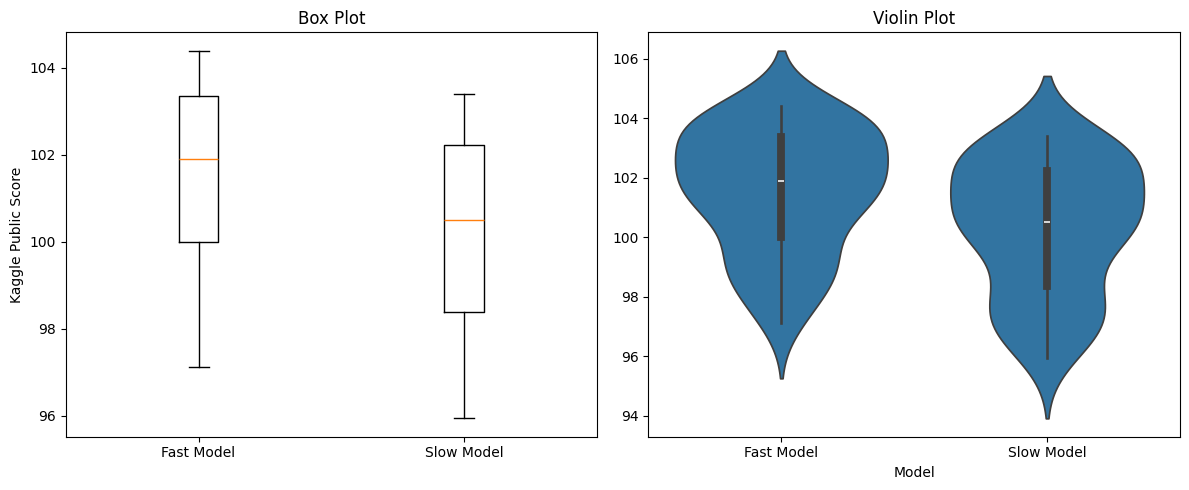

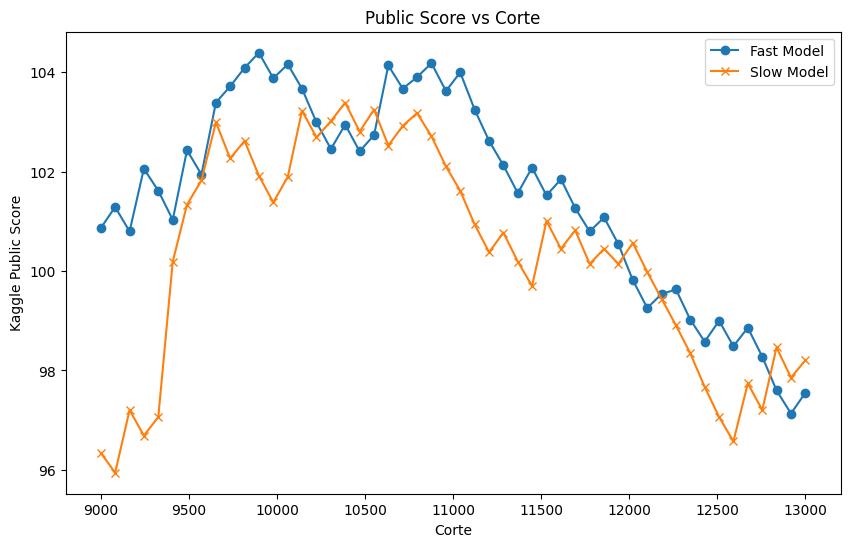


--- Normality Test (Shapiro-Wilk) ---
Fast Model - Statistic: 0.9388, p-value: 0.0121
Slow Model - Statistic: 0.9314, p-value: 0.0062

--- Mann-Whitney U-test Results ---
Statistic: 1654.5000, p-value: 0.0053

--- Interpretation ---
Test Used: Mann-Whitney U-test
Test Statistic: 1654.5000
p-value: 0.0053

Conclusion: There is a statistically significant difference between the two models' performance.


In [ ]:
# Print current working directory
print("Current working directory:", os.getcwd())
    
# Load datasets
fast_df = load_scores('scores_modelito_exp.csv')
slow_df = load_scores('scores_modelito.csv')
    
# Descriptive Statistics
fast_stats = describe_scores(fast_df, "Fast Model")
slow_stats = describe_scores(slow_df, "Slow Model")
    
# Visualizations
create_visualizations(fast_df, slow_df)
plot_public_score_vs_corte(fast_df, slow_df)
    
# Statistical Testing
test_results = perform_statistical_tests(fast_df, slow_df)
    
# Interpretation
print("\n--- Interpretation ---")
print(f"Test Used: {test_results['test_name']}")
print(f"Test Statistic: {test_results['statistic']:.4f}")
print(f"p-value: {test_results['p_value']:.4f}")
    
if test_results['p_value'] < 0.05:
    print("\nConclusion: There is a statistically significant difference between the two models' performance.")
else:
    print("\nConclusion: There is not enough evidence to conclude a significant difference between the two models' performance.")
